<a href="https://colab.research.google.com/github/ewerton-lemes/analise_dos_microdados_do_enem_2022/blob/main/An%C3%A1lise_dos_microdados_do_enem_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos microdados do Enem 2022

Os dados usados nesse notebook foram extraídos em 21/07/2023 do site https://download.inep.gov.br/microdados/microdados_enem_2022.zip

## Importando pacotes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Leitura e visualização dos dados

In [3]:
dados = pd.read_csv('drive/MyDrive/Colab Notebooks/Portifólio/Microdados Enem 2022/Dados/MICRODADOS_ENEM_2022.csv', encoding='latin_1', sep=';')

In [4]:
dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

## Leitura e visualização do dicionário dos microdados

In [6]:
dicionario = pd.read_excel('drive/MyDrive/Colab Notebooks/Portifólio/Microdados Enem 2022/Dados/Dicionário_Microdados_Enem_2022.xlsx')

In [7]:
dicionario.head(10)

,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NOME DA VARIÁVEL,Descrição,Variáveis Categóricas,NaN,Tamanho,Tipo
2,NaN,NaN,Categoria,Descrição,NaN,NaN
3,DADOS DO PARTICIPANTE,NaN,NaN,NaN,NaN,NaN
4,NU_INSCRICAO,Número de inscrição1,NaN,NaN,12,Numérica
5,NU_ANO,Ano do Enem,NaN,NaN,4,Numérica
6,TP_FAIXA_ETARIA,Faixa etária2,1,Menor de 17 anos,2,Numérica
7,NaN,NaN,2,17 anos,NaN,NaN
8,NaN,NaN,3,18 anos,NaN,NaN
9,NaN,NaN,4,19 anos,NaN,NaN


In [8]:
dicionario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   DICIONÁRIO DE VARIÁVEIS - ENEM 2022  90 non-null     object
 1   Unnamed: 1                           85 non-null     object
 2   Unnamed: 2                           301 non-null    object
 3   Unnamed: 3                           304 non-null    object
 4   Unnamed: 4                           77 non-null     object
 5   Unnamed: 5                           77 non-null     object
dtypes: object(6)
memory usage: 16.6+ KB


In [9]:
# Apagar a linha 0 da tabela dicionario e substituir a tabela
dicionario.drop(0, inplace=True)

In [10]:
# Resetar os índices
dicionario.reset_index(drop=True, inplace=True)

In [11]:
# Extrair a lista com os features da tabela dicionario
dicionario_features = list(dicionario['DICIONÁRIO DE VARIÁVEIS - ENEM 2022'])
dicionario_features

['NOME DA VARIÁVEL',
 nan,
 'DADOS DO PARTICIPANTE',
 'NU_INSCRICAO',
 'NU_ANO',
 'TP_FAIXA_ETARIA',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'TP_SEXO',
 nan,
 'TP_ESTADO_CIVIL',
 nan,
 nan,
 nan,
 nan,
 'TP_COR_RACA',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'TP_NACIONALIDADE',
 nan,
 nan,
 nan,
 nan,
 'TP_ST_CONCLUSAO',
 nan,
 nan,
 nan,
 'TP_ANO_CONCLUIU',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'TP_ESCOLA',
 nan,
 nan,
 'TP_ENSINO',
 nan,
 'IN_TREINEIRO',
 nan,
 'DADOS DA ESCOLA',
 'CO_MUNICIPIO_ESC\n',
 nan,
 nan,
 nan,
 nan,
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 nan,
 nan,
 nan,
 'TP_LOCALIZACAO_ESC',
 nan,
 'TP_SIT_FUNC_ESC',
 nan,
 nan,
 nan,
 'DADOS DO LOCAL DE APLICAÇÃO DA PROVA',
 'CO_MUNICIPIO_PROVA',
 nan,
 nan,
 nan,
 nan,
 'NO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'SG_UF_PROVA',
 'DADOS DA PROVA OBJETIVA',
 'TP

In [12]:
# Preparando um dicionário para entender as informações da tabela dados
dic_dicionario_features = {}

for i in range(len(dicionario_features)):
  if type(dicionario_features[i]) == str:
    key = dicionario_features[i]
    index = i
    c = 0
  else:
    c = c + 1
  dic_dicionario_features[key] = [index, index + c]

In [13]:
# lista com a explicação de cada feature da tabela dados
dic_features_info = {}

for i in list(dic_dicionario_features.keys()):
  df = pd.DataFrame(dicionario.loc[dic_dicionario_features[i][0]:dic_dicionario_features[i][1]])
  dic_features_info[i] = df

In [14]:
# Tabelas com a explicação de cada feature da tabela dados
for i in dic_dicionario_features.keys():
  display(dic_features_info[i])

,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NOME DA VARIÁVEL,Descrição,Variáveis Categóricas,NaN,Tamanho,Tipo
1,NaN,NaN,Categoria,Descrição,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
2,DADOS DO PARTICIPANTE,NaN,NaN,NaN,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
3,NU_INSCRICAO,Número de inscrição1,NaN,NaN,12,Numérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
4,NU_ANO,Ano do Enem,NaN,NaN,4,Numérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
5,TP_FAIXA_ETARIA,Faixa etária2,1,Menor de 17 anos,2,Numérica
6,NaN,NaN,2,17 anos,NaN,NaN
7,NaN,NaN,3,18 anos,NaN,NaN
8,NaN,NaN,4,19 anos,NaN,NaN
9,NaN,NaN,5,20 anos,NaN,NaN
10,NaN,NaN,6,21 anos,NaN,NaN
11,NaN,NaN,7,22 anos,NaN,NaN
12,NaN,NaN,8,23 anos,NaN,NaN
13,NaN,NaN,9,24 anos,NaN,NaN
14,NaN,NaN,10,25 anos,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
25,TP_SEXO,Sexo,M,Masculino,1,Alfanumérica
26,NaN,NaN,F,Feminino,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
27,TP_ESTADO_CIVIL,Estado Civil,0,Não informado,1,Numérica
28,NaN,NaN,1,Solteiro(a),NaN,NaN
29,NaN,NaN,2,Casado(a)/Mora com companheiro(a),NaN,NaN
30,NaN,NaN,3,Divorciado(a)/Desquitado(a)/Separado(a),NaN,NaN
31,NaN,NaN,4,Viúvo(a),NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
32,TP_COR_RACA,Cor/raça,0,Não declarado,1,Numérica
33,NaN,NaN,1,Branca,NaN,NaN
34,NaN,NaN,2,Preta,NaN,NaN
35,NaN,NaN,3,Parda,NaN,NaN
36,NaN,NaN,4,Amarela,NaN,NaN
37,NaN,NaN,5,Indígena,NaN,NaN
38,NaN,NaN,6,Não dispõe da informação,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
39,TP_NACIONALIDADE,Nacionalidade,0,Não informado,1,Numérica
40,NaN,NaN,1,Brasileiro(a),NaN,NaN
41,NaN,NaN,2,Brasileiro(a) Naturalizado(a),NaN,NaN
42,NaN,NaN,3,Estrangeiro(a),NaN,NaN
43,NaN,NaN,4,"Brasileiro(a) Nato(a), nascido(a) no exterior",NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
44,TP_ST_CONCLUSAO,Situação de conclusão do Ensino Médio,1,Já concluí o Ensino Médio,1,Numérica
45,NaN,NaN,2,Estou cursando e concluirei o Ensino Médio em ...,NaN,NaN
46,NaN,NaN,3,Estou cursando e concluirei o Ensino Médio apó...,NaN,NaN
47,NaN,NaN,4,Não concluí e não estou cursando o Ensino Médio,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
48,TP_ANO_CONCLUIU,Ano de Conclusão do Ensino Médio,0,Não informado,1,Numérica
49,NaN,NaN,1,2021,NaN,NaN
50,NaN,NaN,2,2020,NaN,NaN
51,NaN,NaN,3,2019,NaN,NaN
52,NaN,NaN,4,2018,NaN,NaN
53,NaN,NaN,5,2017,NaN,NaN
54,NaN,NaN,6,2016,NaN,NaN
55,NaN,NaN,7,2015,NaN,NaN
56,NaN,NaN,8,2014,NaN,NaN
57,NaN,NaN,9,2013,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
65,TP_ESCOLA,Tipo de escola do Ensino Médio,1,Não Respondeu,1,Numérica
66,NaN,NaN,2,Pública,NaN,NaN
67,NaN,NaN,3,Privada,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
68,TP_ENSINO,Tipo de instituição que concluiu ou concluirá ...,1,Ensino Regular,1,Numérica
69,NaN,NaN,2,Educação Especial - Modalidade Substitutiva,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
70,IN_TREINEIRO,Indica se o inscrito fez a prova com intuito d...,1,Sim,1,Numérica
71,NaN,NaN,0,Não,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
72,DADOS DA ESCOLA,NaN,NaN,NaN,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
73,CO_MUNICIPIO_ESC\n,Código do município da escola,NaN,NaN,7,Numérica
74,NaN,1º dígito: Região,NaN,NaN,NaN,NaN
75,NaN,1º e 2º dígitos: UF,NaN,NaN,NaN,NaN
76,NaN,"3º, 4º, 5º e 6º dígitos: Município",NaN,NaN,NaN,NaN
77,NaN,7º dígito: dígito verificador,NaN,NaN,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
78,NO_MUNICIPIO_ESC,Nome do município da escola,NaN,NaN,150,Alfanumérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
79,CO_UF_ESC,Código da Unidade da Federação da escola,NaN,NaN,2,Numérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
80,SG_UF_ESC,Sigla da Unidade da Federação da escola,NaN,NaN,2,Alfanumérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
81,TP_DEPENDENCIA_ADM_ESC,Dependência administrativa (Escola),1,Federal,1,Numérica
82,NaN,NaN,2,Estadual,NaN,NaN
83,NaN,NaN,3,Municipal,NaN,NaN
84,NaN,NaN,4,Privada,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
85,TP_LOCALIZACAO_ESC,Localização (Escola),1,Urbana,1,Numérica
86,NaN,NaN,2,Rural,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
87,TP_SIT_FUNC_ESC,Situação de funcionamento (Escola),1,Em atividade,1,Numérica
88,NaN,NaN,2,Paralisada,NaN,NaN
89,NaN,NaN,3,Extinta,NaN,NaN
90,NaN,NaN,4,Escola extinta em anos anteriores.,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
91,DADOS DO LOCAL DE APLICAÇÃO DA PROVA,NaN,NaN,NaN,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
92,CO_MUNICIPIO_PROVA,Código do município da aplicação da prova,NaN,NaN,7,Numérica
93,NaN,1º dígito: Região,NaN,NaN,NaN,NaN
94,NaN,1º e 2º dígitos: UF,NaN,NaN,NaN,NaN
95,NaN,"3º, 4º, 5º e 6º dígitos: Município",NaN,NaN,NaN,NaN
96,NaN,7º dígito: dígito verificador,NaN,NaN,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
97,NO_MUNICIPIO_PROVA,Nome do município da aplicação da prova,NaN,NaN,150,Alfanumérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
98,CO_UF_PROVA,Código da Unidade da Federação da aplicação da...,NaN,NaN,2,Alfanumérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
99,SG_UF_PROVA,Sigla da Unidade da Federação da aplicação da ...,NaN,NaN,2,Alfanumérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
100,DADOS DA PROVA OBJETIVA,NaN,NaN,NaN,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
101,TP_PRESENCA_CN,Presença na prova objetiva de Ciências da Natu...,0,Faltou à prova,1,Numérica
102,NaN,NaN,1,Presente na prova,NaN,NaN
103,NaN,NaN,2,Eliminado na prova,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
104,TP_PRESENCA_CH,Presença na prova objetiva de Ciências Humanas,0,Faltou à prova,1,Numérica
105,NaN,NaN,1,Presente na prova,NaN,NaN
106,NaN,NaN,2,Eliminado na prova,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
107,TP_PRESENCA_LC,Presença na prova objetiva de Linguagens e Cód...,0,Faltou à prova,1,Numérica
108,NaN,NaN,1,Presente na prova,NaN,NaN
109,NaN,NaN,2,Eliminado na prova,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
110,TP_PRESENCA_MT,Presença na prova objetiva de Matemática,0,Faltou à prova,1,Numérica
111,NaN,NaN,1,Presente na prova,NaN,NaN
112,NaN,NaN,2,Eliminado na prova,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
113,CO_PROVA_CN,Código do tipo de prova de Ciências da Natureza,1085,Azul,4,Numérica
114,NaN,NaN,1086,Amarela,NaN,NaN
115,NaN,NaN,1087,Cinza,NaN,NaN
116,NaN,NaN,1088,Rosa,NaN,NaN
117,NaN,NaN,1092,Laranja - Adaptada Ledor,NaN,NaN
118,NaN,NaN,1093,Verde - Videoprova - Libras,NaN,NaN
119,NaN,NaN,1165,Azul (Reaplicação),NaN,NaN
120,NaN,NaN,1166,Amarela (Reaplicação),NaN,NaN
121,NaN,NaN,1167,Cinza (Reaplicação),NaN,NaN
122,NaN,NaN,1168,Rosa (Reaplicação),NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
127,CO_PROVA_CH,Código do tipo de prova de Ciências Humanas,1055,Azul,4,Numérica
128,NaN,NaN,1056,Amarela,NaN,NaN
129,NaN,NaN,1057,Branca,NaN,NaN
130,NaN,NaN,1058,Rosa,NaN,NaN
131,NaN,NaN,1062,Laranja - Adaptada Ledor,NaN,NaN
132,NaN,NaN,1063,Verde - Videoprova - Libras,NaN,NaN
133,NaN,NaN,1135,Azul (Reaplicação),NaN,NaN
134,NaN,NaN,1136,Amarela (Reaplicação),NaN,NaN
135,NaN,NaN,1137,Branca (Reaplicação),NaN,NaN
136,NaN,NaN,1138,Rosa (Reaplicação),NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
141,CO_PROVA_LC,Código do tipo de prova de Linguagens e Códigos,1065,Azul,4,Numérica
142,NaN,NaN,1066,Amarela,NaN,NaN
143,NaN,NaN,1067,Rosa,NaN,NaN
144,NaN,NaN,1068,Branca,NaN,NaN
145,NaN,NaN,1072,Laranja - Adaptada Ledor,NaN,NaN
146,NaN,NaN,1073,Verde - Videoprova - Libras,NaN,NaN
147,NaN,NaN,1145,Azul (Reaplicação),NaN,NaN
148,NaN,NaN,1146,Amarela (Reaplicação),NaN,NaN
149,NaN,NaN,1147,Rosa (Reaplicação),NaN,NaN
150,NaN,NaN,1148,Branca (Reaplicação),NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
155,CO_PROVA_MT,Código do tipo de prova de Matemática,1075,Azul,4,Numérica
156,NaN,NaN,1076,Amarela,NaN,NaN
157,NaN,NaN,1077,Rosa,NaN,NaN
158,NaN,NaN,1078,Cinza,NaN,NaN
159,NaN,NaN,1082,Laranja - Adaptada Ledor,NaN,NaN
160,NaN,NaN,1083,Verde - Videoprova - Libras,NaN,NaN
161,NaN,NaN,1155,Azul (Reaplicação),NaN,NaN
162,NaN,NaN,1156,Amarela (Reaplicação),NaN,NaN
163,NaN,NaN,1157,Rosa (Reaplicação),NaN,NaN
164,NaN,NaN,1158,Cinza (Reaplicação),NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
169,NU_NOTA_CN,Nota da prova de Ciências da Natureza,NaN,NaN,9,Numérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
170,NU_NOTA_CH,Nota da prova de Ciências Humanas,NaN,NaN,9,Numérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
171,NU_NOTA_LC,Nota da prova de Linguagens e Códigos,NaN,NaN,9,Numérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
172,NU_NOTA_MT,Nota da prova de Matemática,NaN,NaN,9,Numérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
173,TX_RESPOSTAS_CN,Vetor com as respostas da parte objetiva da pr...,NaN,"A,B,C,D, E, * (dupla marcação), . (em branco)",45,Alfanumérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
174,TX_RESPOSTAS_CH,Vetor com as respostas da parte objetiva da pr...,NaN,"A,B,C,D, E, * (dupla marcação), . (em branco)",45,Alfanumérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
175,TX_RESPOSTAS_LC,Vetor com as respostas da parte objetiva da pr...,NaN,"A,B,C,D, E, * (dupla marcação), . (em branco),...",45,Alfanumérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
176,TX_RESPOSTAS_MT,Vetor com as respostas da parte objetiva da pr...,NaN,"A,B,C,D, E, * (dupla marcação), . (em branco)",45,Alfanumérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
177,TP_LINGUA,Língua Estrangeira,0,Inglês,1,Numérica
178,NaN,NaN,1,Espanhol,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
179,TX_GABARITO_CN,Vetor com o gabarito da parte objetiva da prov...,NaN,NaN,45,Alfanumérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
180,TX_GABARITO_CH,Vetor com o gabarito da parte objetiva da prov...,NaN,NaN,45,Alfanumérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
181,TX_GABARITO_LC,Vetor com o gabarito da parte objetiva da prov...,NaN,NaN,50,Alfanumérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
182,TX_GABARITO_MT,Vetor com o gabarito da parte objetiva da prov...,NaN,NaN,45,Alfanumérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
183,DADOS DA REDAÇÃO,NaN,NaN,NaN,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
184,TP_STATUS_REDACAO,Situação da redação do participante,1,Sem problemas,1,Numérica
185,NaN,NaN,2,Anulada,NaN,NaN
186,NaN,NaN,3,Cópia Texto Motivador,NaN,NaN
187,NaN,NaN,4,Em Branco,NaN,NaN
188,NaN,NaN,6,Fuga ao tema,NaN,NaN
189,NaN,NaN,7,Não atendimento ao tipo textual,NaN,NaN
190,NaN,NaN,8,Texto insuficiente,NaN,NaN
191,NaN,NaN,9,Parte desconectada,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
192,NU_NOTA_COMP1,Nota da competência 1 - Demonstrar domínio da ...,NaN,NaN,9,Numérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
193,NU_NOTA_COMP2,Nota da competência 2 - Compreender a proposta...,NaN,NaN,9,Numérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
194,NU_NOTA_COMP3,"Nota da competência 3 - Selecionar, relacionar...",NaN,NaN,9,Numérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
195,NU_NOTA_COMP4,Nota da competência 4 - Demonstrar conheciment...,NaN,NaN,9,Numérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
196,NU_NOTA_COMP5,Nota da competência 5 - Elaborar proposta de i...,NaN,NaN,9,Numérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
197,NU_NOTA_REDACAO,Nota da prova de redação,NaN,NaN,9,Numérica


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
198,DADOS DO QUESTIONÁRIO SOCIOECONÔMICO,NaN,NaN,NaN,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
199,Q001,"Até que série seu pai, ou o homem responsável ...",A,Nunca estudou.,1,Alfanumérica
200,NaN,NaN,B,Não completou a 4ª série/5º ano do Ensino Fund...,NaN,NaN
201,NaN,NaN,C,"Completou a 4ª série/5º ano, mas não completou...",NaN,NaN
202,NaN,NaN,D,Completou a 8ª série/9º ano do Ensino Fundamen...,NaN,NaN
203,NaN,NaN,E,"Completou o Ensino Médio, mas não completou a ...",NaN,NaN
204,NaN,NaN,F,"Completou a Faculdade, mas não completou a Pós...",NaN,NaN
205,NaN,NaN,G,Completou a Pós-graduação.,NaN,NaN
206,NaN,NaN,H,Não sei.,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
207,Q002,"Até que série sua mãe, ou a mulher responsável...",A,Nunca estudou.,1,Alfanumérica
208,NaN,NaN,B,Não completou a 4ª série/5º ano do Ensino Fund...,NaN,NaN
209,NaN,NaN,C,"Completou a 4ª série/5º ano, mas não completou...",NaN,NaN
210,NaN,NaN,D,Completou a 8ª série/9º ano do Ensino Fundamen...,NaN,NaN
211,NaN,NaN,E,"Completou o Ensino Médio, mas não completou a ...",NaN,NaN
212,NaN,NaN,F,"Completou a Faculdade, mas não completou a Pós...",NaN,NaN
213,NaN,NaN,G,Completou a Pós-graduação.,NaN,NaN
214,NaN,NaN,H,Não sei.,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
215,Q003,A partir da apresentação de algumas ocupações ...,A,"Grupo 1: Lavrador, agricultor sem empregados, ...",1,Alfanumérica
216,NaN,NaN,B,"Grupo 2: Diarista, empregado doméstico, cuidad...",NaN,NaN
217,NaN,NaN,C,"Grupo 3: Padeiro, cozinheiro industrial ou em ...",NaN,NaN
218,NaN,NaN,D,Grupo 4: Professor (de ensino fundamental ou m...,NaN,NaN
219,NaN,NaN,E,"Grupo 5: Médico, engenheiro, dentista, psicólo...",NaN,NaN
220,NaN,NaN,F,Não sei.,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
221,Q004,A partir da apresentação de algumas ocupações ...,A,"Grupo 1: Lavradora, agricultora sem empregados...",2,Numérica
222,NaN,NaN,B,"Grupo 2: Diarista, empregada doméstica, cuidad...",NaN,NaN
223,NaN,NaN,C,"Grupo 3: Padeira, cozinheira industrial ou em ...",NaN,NaN
224,NaN,NaN,D,Grupo 4: Professora (de ensino fundamental ou ...,NaN,NaN
225,NaN,NaN,E,"Grupo 5: Médica, engenheira, dentista, psicólo...",NaN,NaN
226,NaN,NaN,F,Não sei.,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
227,Q005,"Incluindo você, quantas pessoas moram atualmen...",1,"1, pois moro sozinho(a).",2,Numérica
228,NaN,NaN,2,2,NaN,NaN
229,NaN,NaN,3,3,NaN,NaN
230,NaN,NaN,4,4,NaN,NaN
231,NaN,NaN,5,5,NaN,NaN
232,NaN,NaN,6,6,NaN,NaN
233,NaN,NaN,7,7,NaN,NaN
234,NaN,NaN,8,8,NaN,NaN
235,NaN,NaN,9,9,NaN,NaN
236,NaN,NaN,10,10,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
247,Q006,Qual é a renda mensal de sua família? (Some a ...,A,Nenhuma Renda,1,Alfanumérica
248,NaN,NaN,B,"Até R$ 1.212,00",NaN,NaN
249,NaN,NaN,C,"De R$ 1.212,01 até R$ 1.818,00.",NaN,NaN
250,NaN,NaN,D,"De R$ 1.818,01 até R$ 2.424,00.",NaN,NaN
251,NaN,NaN,E,"De R$ 2.424,01 até R$ 3.030,00.",NaN,NaN
252,NaN,NaN,F,"De R$ 3.030,01 até R$ 3.636,00.",NaN,NaN
253,NaN,NaN,G,"De R$ 3.636,01 até R$ 4.848,00.",NaN,NaN
254,NaN,NaN,H,"De R$ 4.848,01 até R$ 6.060,00.",NaN,NaN
255,NaN,NaN,I,"De R$ 6.060,01 até R$ 7.272,00.",NaN,NaN
256,NaN,NaN,J,"De R$ 7.272,01 até R$ 8.484,00.",NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
264,Q007,Em sua residência trabalha empregado(a) domést...,A,Não.,1,Alfanumérica
265,NaN,NaN,B,"Sim, um ou dois dias por semana.",NaN,NaN
266,NaN,NaN,C,"Sim, três ou quatro dias por semana.",NaN,NaN
267,NaN,NaN,D,"Sim, pelo menos cinco dias por semana.",NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
268,Q008,Na sua residência tem banheiro?,A,Não.,1,Alfanumérica
269,NaN,NaN,B,"Sim, um.",NaN,NaN
270,NaN,NaN,C,"Sim, dois.",NaN,NaN
271,NaN,NaN,D,"Sim, três.",NaN,NaN
272,NaN,NaN,E,"Sim, quatro ou mais.",NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
273,Q009,Na sua residência tem quartos para dormir?,A,Não.,1,Alfanumérica
274,NaN,NaN,B,"Sim, um.",NaN,NaN
275,NaN,NaN,C,"Sim, dois.",NaN,NaN
276,NaN,NaN,D,"Sim, três.",NaN,NaN
277,NaN,NaN,E,"Sim, quatro ou mais.",NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
278,Q010,Na sua residência tem carro?,A,Não.,1,Alfanumérica
279,NaN,NaN,B,"Sim, um.",NaN,NaN
280,NaN,NaN,C,"Sim, dois.",NaN,NaN
281,NaN,NaN,D,"Sim, três.",NaN,NaN
282,NaN,NaN,E,"Sim, quatro ou mais.",NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
283,Q011,Na sua residência tem motocicleta?,A,Não.,1,Alfanumérica
284,NaN,NaN,B,"Sim, uma.",NaN,NaN
285,NaN,NaN,C,"Sim, duas.",NaN,NaN
286,NaN,NaN,D,"Sim, três.",NaN,NaN
287,NaN,NaN,E,"Sim, quatro ou mais.",NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
288,Q012,Na sua residência tem geladeira?,A,Não.,1,Alfanumérica
289,NaN,NaN,B,"Sim, uma.",NaN,NaN
290,NaN,NaN,C,"Sim, duas.",NaN,NaN
291,NaN,NaN,D,"Sim, três.",NaN,NaN
292,NaN,NaN,E,"Sim, quatro ou mais.",NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
293,Q013,Na sua residência tem freezer (independente ou...,A,Não.,1,Alfanumérica
294,NaN,NaN,B,"Sim, um.",NaN,NaN
295,NaN,NaN,C,"Sim, dois.",NaN,NaN
296,NaN,NaN,D,"Sim, três.",NaN,NaN
297,NaN,NaN,E,"Sim, quatro ou mais.",NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
298,Q014,Na sua residência tem máquina de lavar roupa? ...,A,Não.,1,Alfanumérica
299,NaN,NaN,B,"Sim, uma.",NaN,NaN
300,NaN,NaN,C,"Sim, duas.",NaN,NaN
301,NaN,NaN,D,"Sim, três.",NaN,NaN
302,NaN,NaN,E,"Sim, quatro ou mais.",NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
303,Q015,Na sua residência tem máquina de secar roupa (...,A,Não.,1,Alfanumérica
304,NaN,NaN,B,"Sim, uma.",NaN,NaN
305,NaN,NaN,C,"Sim, duas.",NaN,NaN
306,NaN,NaN,D,"Sim, três.",NaN,NaN
307,NaN,NaN,E,"Sim, quatro ou mais.",NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
308,Q016,Na sua residência tem forno micro-ondas?,A,Não.,1,Alfanumérica
309,NaN,NaN,B,"Sim, um.",NaN,NaN
310,NaN,NaN,C,"Sim, dois.",NaN,NaN
311,NaN,NaN,D,"Sim, três.",NaN,NaN
312,NaN,NaN,E,"Sim, quatro ou mais.",NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
313,Q017,Na sua residência tem máquina de lavar louça?,A,Não.,1,Alfanumérica
314,NaN,NaN,B,"Sim, uma.",NaN,NaN
315,NaN,NaN,C,"Sim, duas.",NaN,NaN
316,NaN,NaN,D,"Sim, três.",NaN,NaN
317,NaN,NaN,E,"Sim, quatro ou mais.",NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
318,Q018,Na sua residência tem aspirador de pó?,A,Não.,1,Alfanumérica
319,NaN,NaN,B,Sim.,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
320,Q019,Na sua residência tem televisão em cores?,A,Não.,1,Alfanumérica
321,NaN,NaN,B,"Sim, uma.",NaN,NaN
322,NaN,NaN,C,"Sim, duas.",NaN,NaN
323,NaN,NaN,D,"Sim, três.",NaN,NaN
324,NaN,NaN,E,"Sim, quatro ou mais.",NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
325,Q020,Na sua residência tem aparelho de DVD?,A,Não.,1,Alfanumérica
326,NaN,NaN,B,Sim.,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
327,Q021,Na sua residência tem TV por assinatura?,A,Não.,1,Alfanumérica
328,NaN,NaN,B,Sim.,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
329,Q022,Na sua residência tem telefone celular?,A,Não.,1,Alfanumérica
330,NaN,NaN,B,"Sim, um.",NaN,NaN
331,NaN,NaN,C,"Sim, dois.",NaN,NaN
332,NaN,NaN,D,"Sim, três.",NaN,NaN
333,NaN,NaN,E,"Sim, quatro ou mais.",NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
334,Q023,Na sua residência tem telefone fixo?,A,Não.,1,Alfanumérica
335,NaN,NaN,B,Sim.,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
336,Q024,Na sua residência tem computador?,A,Não.,1,Alfanumérica
337,NaN,NaN,B,"Sim, um.",NaN,NaN
338,NaN,NaN,C,"Sim, dois.",NaN,NaN
339,NaN,NaN,D,"Sim, três.",NaN,NaN
340,NaN,NaN,E,"Sim, quatro ou mais.",NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
341,Q025,Na sua residência tem acesso à Internet?,A,Não.,1,Alfanumérica
342,NaN,NaN,B,Sim.,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
343,"1. Referente ao Enem 2022, trata-se de uma más...",NaN,NaN,NaN,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
344,2. A partir da Idade do inscrito em 31/12/2022.,NaN,NaN,NaN,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
345,3. Foi considerado treineiro o inscrito que nã...,NaN,NaN,NaN,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
346,4. As 45 primeiras posições deste campo são re...,NaN,NaN,NaN,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
347,5. As 45 primeiras posições deste campo são re...,NaN,NaN,NaN,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
348,6. As 45 primeiras posições deste campo são re...,NaN,NaN,NaN,NaN,NaN


,DICIONÁRIO DE VARIÁVEIS - ENEM 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
349,7. As 50 primeiras posições deste campo são re...,NaN,NaN,NaN,NaN,NaN


## Respondendo algumas perguntas sobre os microdados do Enem 2022

### 1. Qual a porcentagem das cores/raças dos candidatos do Enem 2022?

In [42]:
dados['TP_COR_RACA'].unique()

array([2, 1, 3, 5, 0, 4])

In [15]:
dados['TP_COR_RACA'].value_counts().sort_values(ascending=False)

3    1488844
1    1428081
2     408422
4      66051
0      64867
5      19840
Name: TP_COR_RACA, dtype: int64

In [16]:
(dados['TP_COR_RACA'].value_counts(normalize=True) * 100).round(2)

3    42.83
1    41.08
2    11.75
4     1.90
0     1.87
5     0.57
Name: TP_COR_RACA, dtype: float64

In [17]:
frequencia = dados['TP_COR_RACA'].value_counts().sort_values(ascending=False)
porcentagem = (dados['TP_COR_RACA'].value_counts(normalize=True) * 100).round(2)

In [18]:
cor_raca = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': porcentagem})
cor_raca

,Frequência,Porcentagem (%)
3,1488844,42.83
1,1428081,41.08
2,408422,11.75
4,66051,1.90
0,64867,1.87
5,19840,0.57


In [19]:
cor_raca.rename(index = {0: 'Não declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Não dispõe da informação'},
                inplace=True)
cor_raca.rename_axis('Cor/Raça', axis='columns', inplace=True)

In [20]:
cor_raca

Cor/Raça,Frequência,Porcentagem (%)
Parda,1488844,42.83
Branca,1428081,41.08
Preta,408422,11.75
Amarela,66051,1.90
Não declarado,64867,1.87
Indígena,19840,0.57


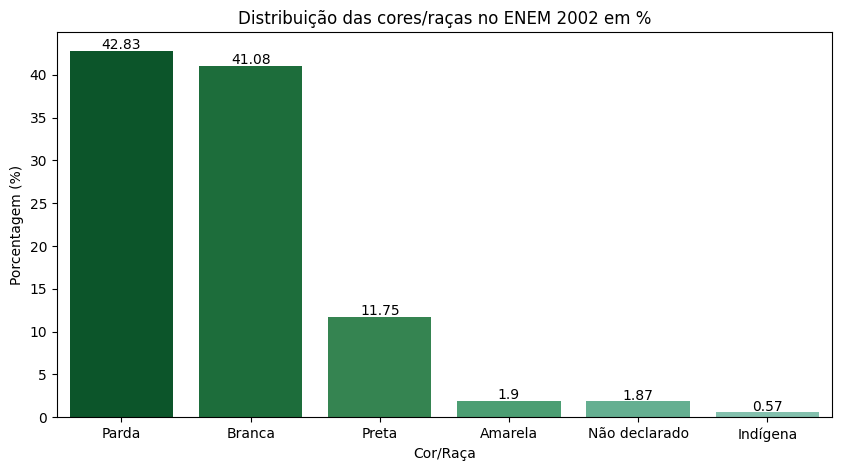

In [21]:
palette = sns.set_palette("BuGn_r", n_colors = 10)

# Visualizando a tabela acima por meio de um gráfico de barras

plt.figure(figsize=(10,5))
fig1 = sns.barplot(data=cor_raca.reset_index(), x='index', y='Porcentagem (%)', palette=palette)
plt.title('Distribuição das cores/raças no ENEM 2002 em %')
plt.xlabel('Cor/Raça')

for i in fig1.patches:
  fig1.annotate(i.get_height(), xy = (i.get_x() + i.get_width()/2, i.get_height() + .2), ha='center')

plt.show()

### Qual é a  distribuição das cores/raças do Enem 2022 por sexo?

In [22]:
# Dicionários

sexo = {'M': 'Masculino', 'F': 'Feminino'}
raca = {0: 'Não declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Não dispõe da informação'}

In [23]:
frequencia_cor_sexo = pd.crosstab(dados['TP_COR_RACA'], dados['TP_SEXO'])
frequencia_cor_sexo.rename(index=raca, inplace=True)
frequencia_cor_sexo.rename(columns=sexo, inplace=True)

In [25]:
frequencia_cor_sexo.rename_axis(index='Cor/Raça', columns='Sexo', inplace=True)
frequencia_cor_sexo

Sexo,Feminino,Masculino
Cor/Raça,,
Não declarado,38056,26811
Branca,866166,561915
Preta,244645,163777
Parda,915668,573176
Amarela,44491,21560
Indígena,11493,8347


In [24]:
percentual_cor_sexo = (pd.crosstab(dados['TP_COR_RACA'], dados['TP_SEXO'], normalize=True) * 100).round(2)
percentual_cor_sexo.rename(index=raca, inplace=True)
percentual_cor_sexo.rename(columns=sexo, inplace=True)
percentual_cor_sexo.rename_axis(index='Cor/Raça', columns='Sexo', inplace=True)
percentual_cor_sexo

Sexo,Feminino,Masculino
Cor/Raça,,
Não declarado,1.09,0.77
Branca,24.92,16.17
Preta,7.04,4.71
Parda,26.34,16.49
Amarela,1.28,0.62
Indígena,0.33,0.24


In [60]:
dados['TP_SEXO'].value_counts()

F    2120519
M    1355586
Name: TP_SEXO, dtype: int64

In [30]:
# Criando uma tabela para visualizar a tabela anterior por meio de um gráfico

data = pd.DataFrame(dados.groupby(['TP_COR_RACA', 'TP_SEXO'])['NU_INSCRICAO'].count().reset_index())
data

,TP_COR_RACA,TP_SEXO,NU_INSCRICAO
0,0,F,38056
1,0,M,26811
2,1,F,866166
3,1,M,561915
4,2,F,244645
5,2,M,163777
6,3,F,915668
7,3,M,573176
8,4,F,44491
9,4,M,21560


In [31]:
data['percentual'] = ((data['NU_INSCRICAO'] / data['NU_INSCRICAO'].sum()) * 100).round(2)

In [32]:
data

,TP_COR_RACA,TP_SEXO,NU_INSCRICAO,percentual
0,0,F,38056,1.09
1,0,M,26811,0.77
2,1,F,866166,24.92
3,1,M,561915,16.17
4,2,F,244645,7.04
5,2,M,163777,4.71
6,3,F,915668,26.34
7,3,M,573176,16.49
8,4,F,44491,1.28
9,4,M,21560,0.62


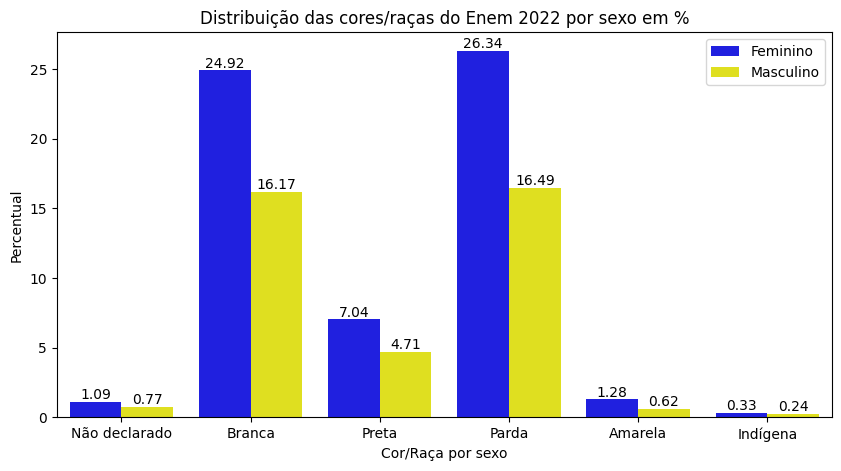

In [59]:


plt.figure(figsize=(10,5))
fig2 = sns.barplot(data=data, x='TP_COR_RACA', y='percentual', hue='TP_SEXO', palette={'F':'b', 'M':'yellow'})
plt.title('Distribuição das cores/raças do Enem 2022 por sexo em %')
plt.xlabel('Cor/Raça por sexo')
plt.ylabel('Percentual')
fig2.set_xticklabels(['Não declarado','Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'])

h, l = fig2.get_legend_handles_labels()

fig2.legend(h, ['Feminino', 'Masculino'])

for i in fig2.patches:
  fig2.annotate(i.get_height(), xy = (i.get_x() + i.get_width()/2, i.get_height() + .2), ha='center')

plt.show()